In [485]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

In [391]:
house_df = pd.read_csv("complete_houses_mod.csv")
# df = house_df.loc[:, house_df.isnull().mean() < .8]
# df

In [392]:
house_df.columns

Index(['Unnamed: 0', 'id', 'Zip', 'Price', 'Price of square meter',
       'Living area', 'Number of rooms', 'Garden surface', 'Terrace surface',
       'Open fire', 'Surface of the land', 'Number of facades',
       'Swimming pool', 'Building Cond. values', 'Kitchen values',
       'Primary energy consumption', 'Energy efficiency'],
      dtype='object')

In [393]:
from typing import List
# Remove outliers
def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [439]:
# house_df = remove_outliers(house_df, ['Living area'], 4)
# house_df = remove_outliers(house_df, ['Surface of the land'], 3)

Working on column: Living area
Working on column: Surface of the land


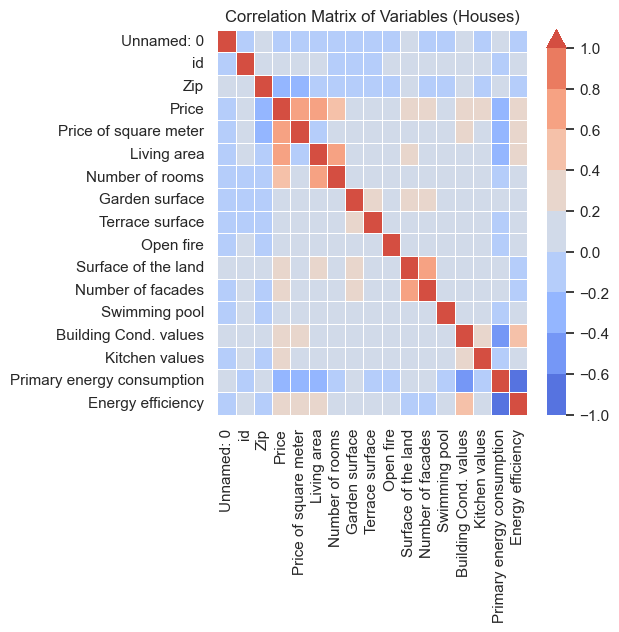

In [489]:
corr_matrix = house_df.corr(method='spearman')
colors = sns.color_palette('coolwarm', 10)
levels = [-1.0, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend="max")
sns.heatmap(corr_matrix, cmap = cmap, linewidths=.5, norm=norm)

plt.title('Correlation Matrix of Variables (Houses)')
sns.set (rc = {'figure.figsize':(15, 15)})
plt.show()

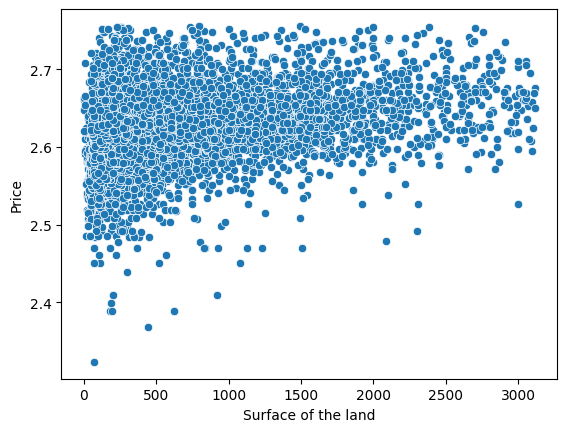

In [440]:
sns.scatterplot(x='Surface of the land', y="Price", data=house_df)
plt.show()

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/105875389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


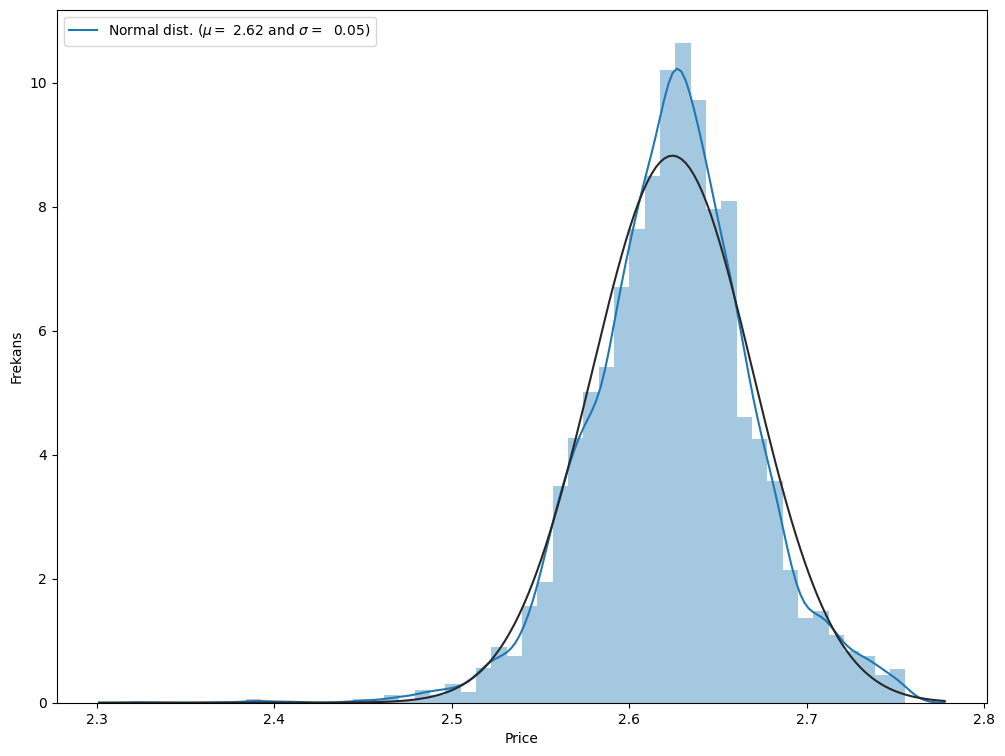

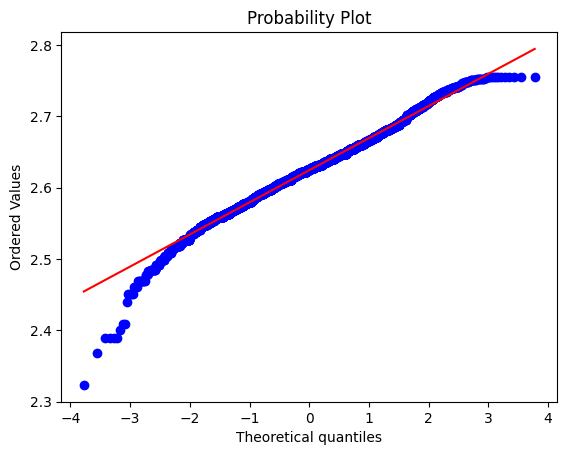

In [441]:
plt.subplots(figsize=(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi oluşturduğumuz dağılımı çizdirelim.
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma = $ {: .2f})'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frekans')

#Olasılık durumunuda çizdirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/4007975713.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(house_df['Price'], fit = stats.norm)


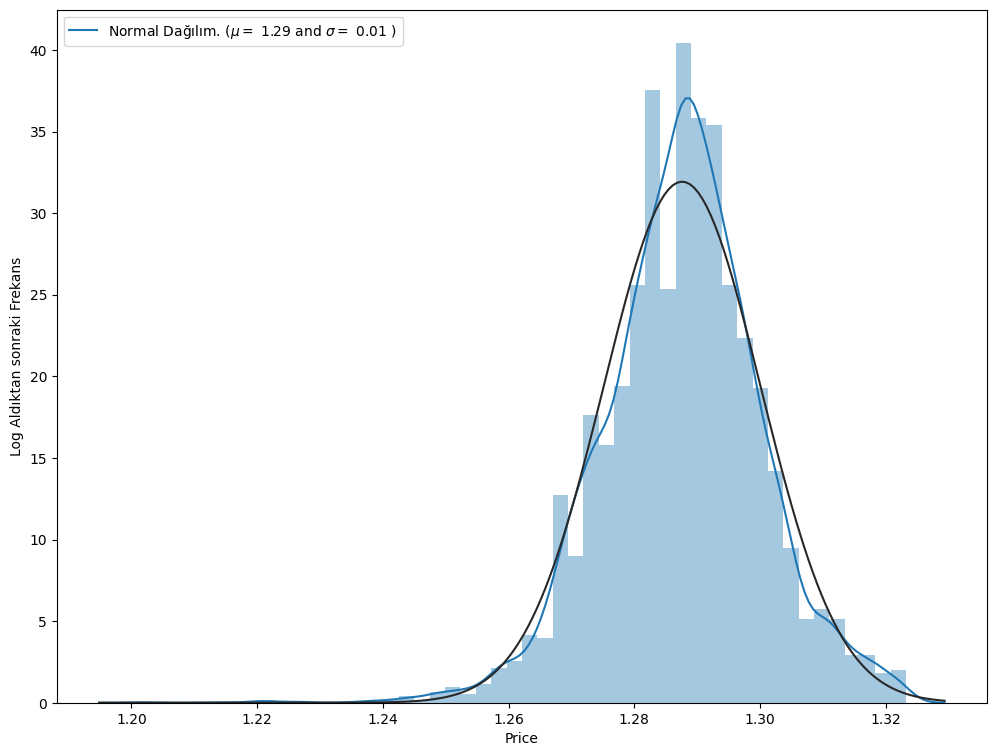

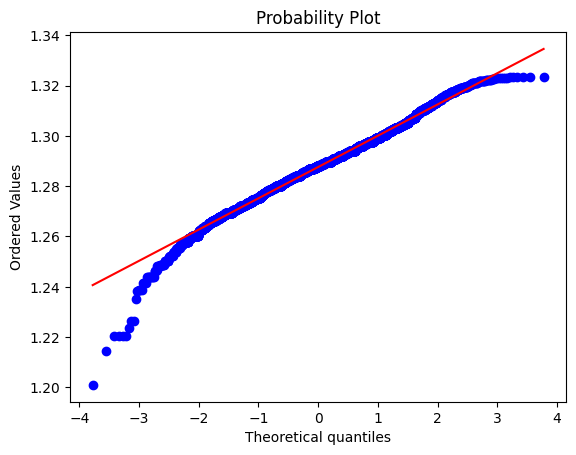

In [442]:
house_df['Price'] = np.log1p(house_df['Price'])

#Şimdi normal dağılımı tekrar kontrol edelim

plt.subplots(figsize =(12, 9))
sns.distplot(house_df['Price'], fit = stats.norm)

#
(mu, sigma) = stats.norm.fit(house_df['Price'])

#Şimdi dağılımı görselleştirelim
plt.legend(['Normal Dağılım. ($\mu=$ {:.2f} and $\sigma = $ {:.2f} )' .format(mu, sigma)], loc = 'best')
plt.ylabel('Log Aldıktan sonraki Frekans')

#Olasılık durumunu görselleştirelim
fig = plt.figure()
stats.probplot(house_df['Price'], plot = plt)
plt.show()

In [490]:
y = house_df[['Price']]
X = house_df[[
       # 'Building Cond. values',
       # 'Number of facades',
       # 'Number of rooms',
       'Living area',
       # 'Kitchen values',
       # 'Surface of the land',
       # 'Terrace surface',
       # 'Garden surface','Open fire',
       # 'Swimming pool',
       'Primary energy consumption'
       ]]

In [491]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7) 

In [492]:
lm = LinearRegression() 

reg = lm.fit(X_train,y_train)

reg.score(X, y)

0.43107653905902843

In [493]:
coeff_df = pd.DataFrame(lm.coef_.T,X.columns,columns=['Coefficient'])

In [494]:
coeff_df

,Coefficient
Living area,0.000074
Primary energy consumption,-0.000013


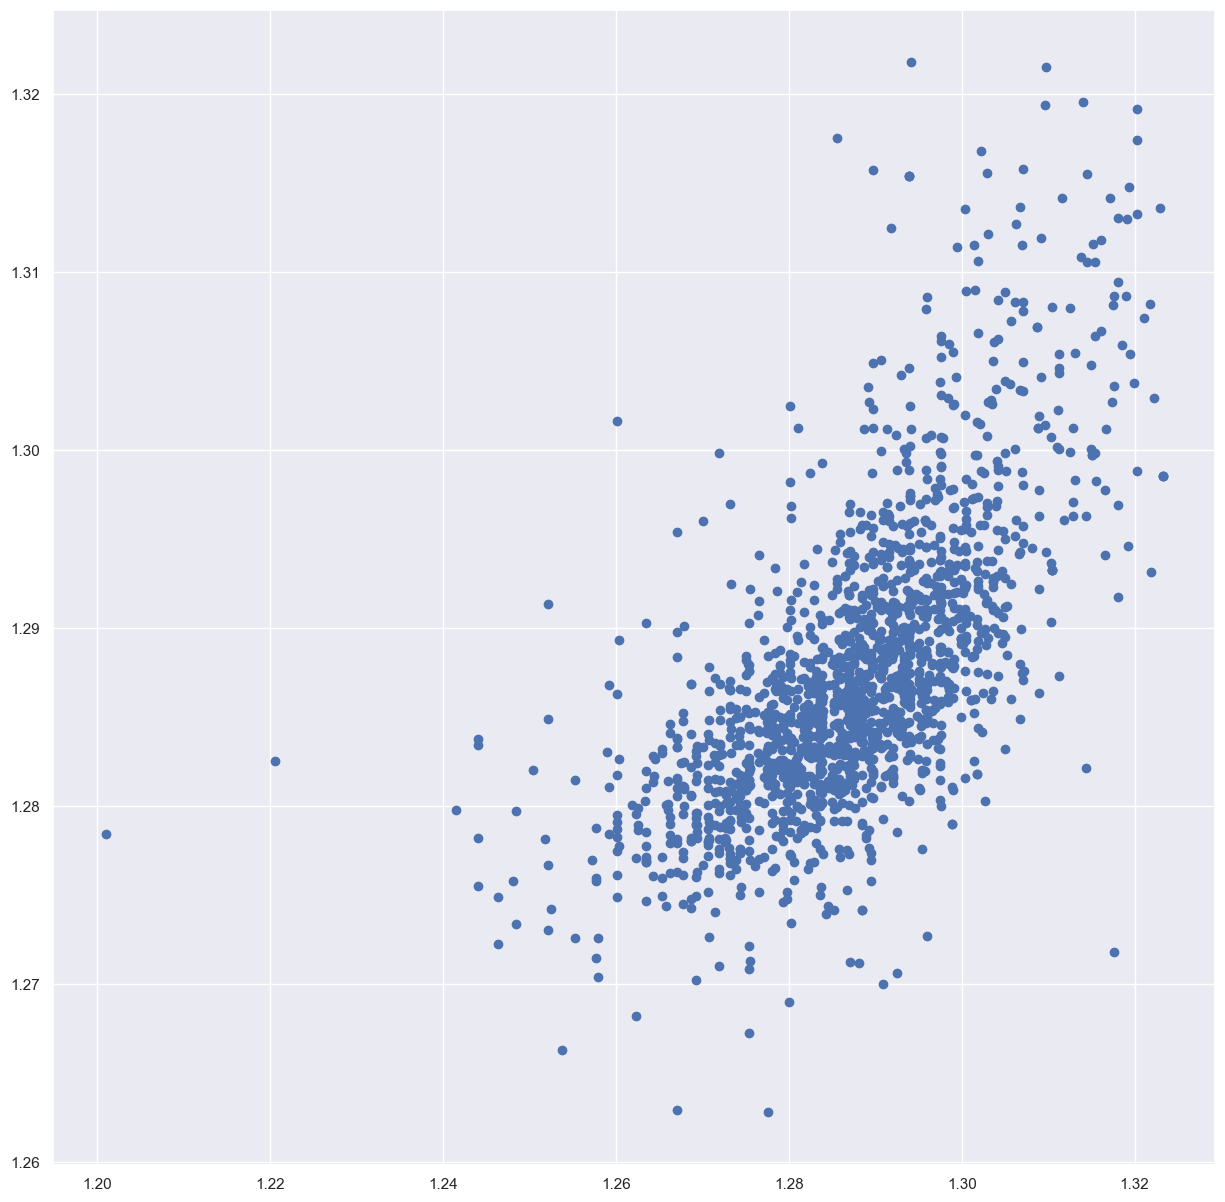

In [499]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

<Axes: xlabel='Price'>

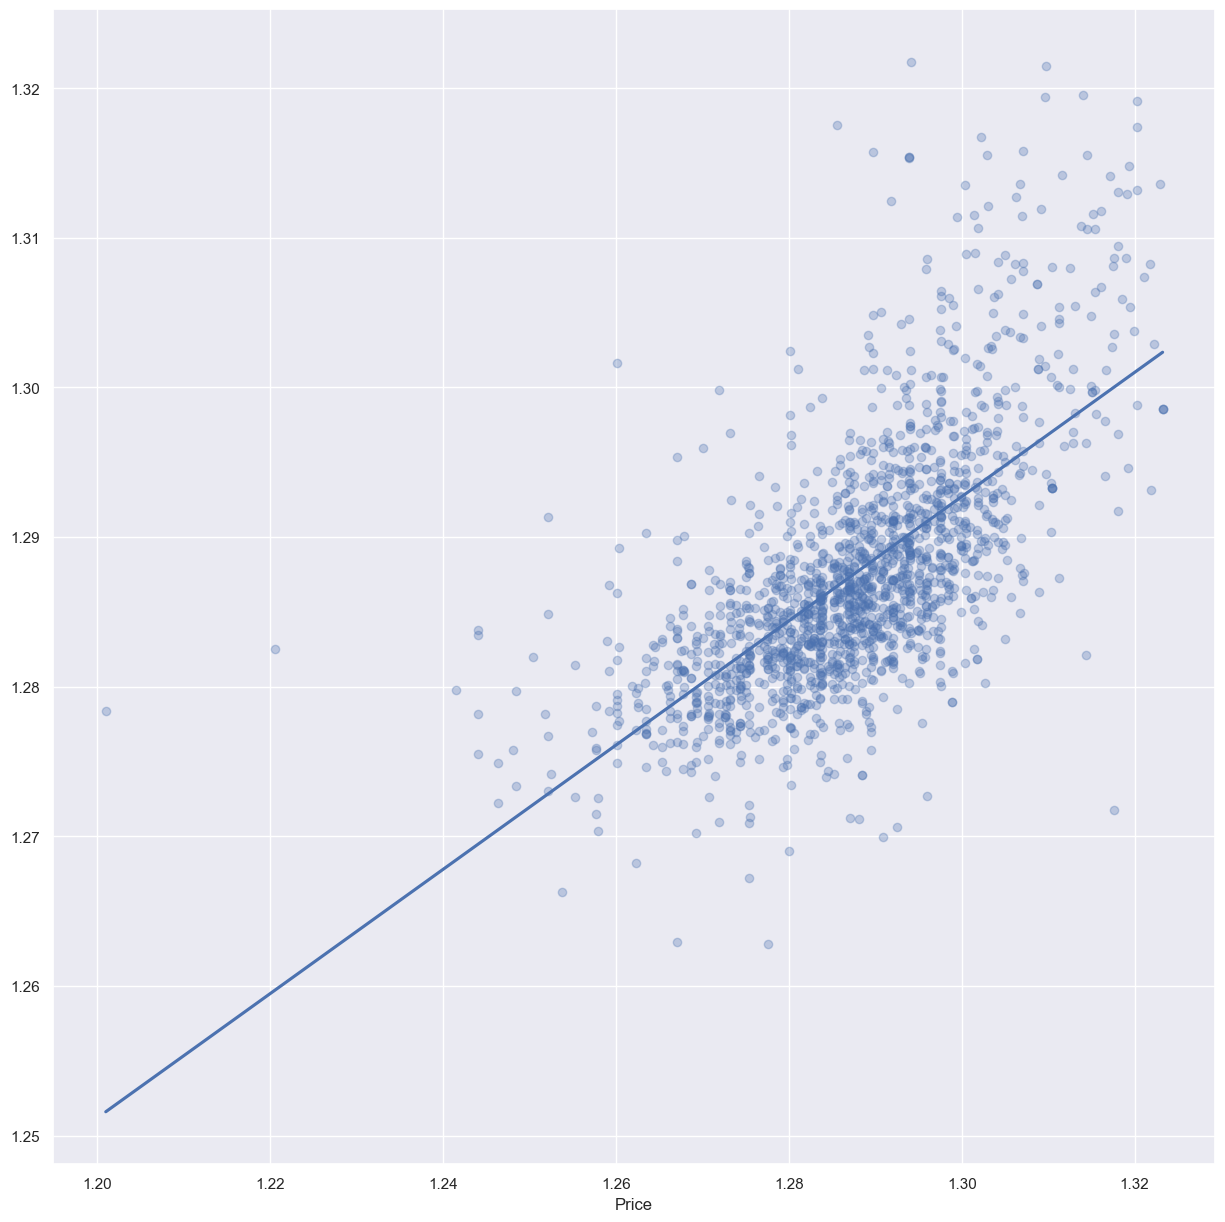

In [496]:
sns.regplot(x=y_test,y=predictions,ci=None,scatter_kws={'alpha': 0.3})

/var/folders/lh/rbpzcs3522qg45v9lc_xvgyc0000gn/T/ipykernel_39642/1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: ylabel='Density'>

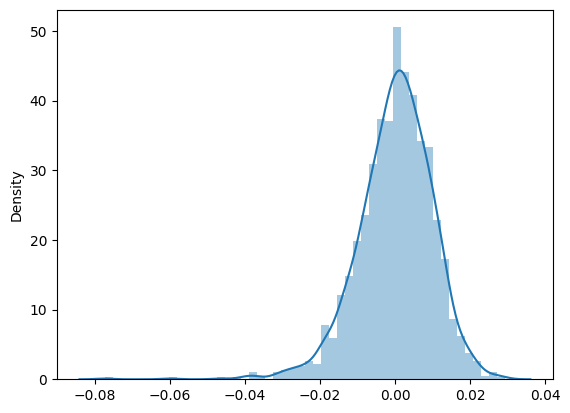

In [450]:
sns.distplot((y_test-predictions),bins=50)

In [451]:
reg = lm.fit(X_train,y_train)

In [452]:
# print("House DataFrame shape (before): ",house_df.shape)
# print("House data min (with outliers): ",house_df['Price'].min())
# print("House data max (with outliers): ",house_df['Price'].max())

# from typing import List
# # Remove outliers
# def remove_outliers(df: pd.DataFrame, columns: List[str], n_std: int) -> pd.DataFrame:
#     for col in columns:
#         print('Working on column: {}'.format(col))
        
#         mean = df[col].mean()
#         sd = df[col].std()
        
#         df = df[(df[col] <= mean+(n_std*sd))]
        
#     return df

# new_housedf = remove_outliers(house_df, ['Price'], 1)

# print("_"*30)
# print("House DataFrame shape (after removing): ",new_housedf.shape)
# print("House data min (without outliers): ", new_housedf['Price'].min())
# print("House data max (without outliers): ", new_housedf['Price'].max())

In [453]:
# y = new_housedf[['Price']]
# X = new_housedf[[
#        'Building Cond. values',
#        'Number of facades',
#        'Number of rooms',
#        'Living area',
#        'Kitchen values',
#        'Surface of the land',
#        'Terrace surface',
#        'Garden surface','Open fire',
#        'Swimming pool'
#        ]]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

# lm = LinearRegression() 
# reg = lm.fit(X_train,y_train)
# reg.score(X, y)

In [454]:
# predictions = lm.predict(X_test)
# plt.scatter(y_test,predictions)

In [468]:
new_ho = pd.read_csv("complete_houses_mod.csv")

In [469]:
X = new_ho.drop('Price', axis=1).values
y = new_ho['Price'].values

In [470]:
new_ho

,Unnamed: 0,id,Zip,Price,Price of square meter,Living area,Number of rooms,Garden surface,Terrace surface,Open fire,Surface of the land,Number of facades,Swimming pool,Building Cond. values,Kitchen values,Primary energy consumption,Energy efficiency
0,0,10578809,1770,349000,1938.89,180,3,150,25,0,256,2,0,4,3,241,5
1,1,10578941,8200,625000,3378.38,185,3,400,0,0,539,3,0,4,3,292,5
2,2,10577515,4100,149000,1419.05,105,2,25,9,0,105,2,0,3,2,469,3
3,3,10577846,5300,335000,1602.87,209,4,698,36,0,2185,4,0,3,1,196,6
4,4,10523130,1190,545000,2145.67,254,4,0,45,0,260,2,0,2,1,517,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,9339,10531072,3520,382230,2344.97,163,3,406,0,0,406,3,0,2,1,355,4
9340,9340,10531067,3520,382484,2346.53,163,3,405,0,0,405,3,0,2,1,355,4
9341,9341,10531070,3520,384070,2356.26,163,3,405,0,0,405,3,0,2,1,355,4
9342,9342,10437655,8530,406000,2194.59,185,3,0,3,0,300,3,0,1,0,438,3


In [479]:
X_larea = X[:,4]
X_larea

array([180., 185., 105., ..., 163., 185., 250.])

In [480]:
y = y.reshape(-1, 1)
X_larea = X_larea.reshape(-1, 1)


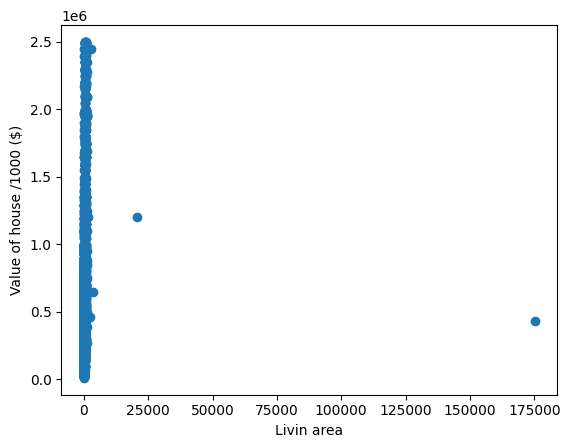

In [481]:
plt.scatter(X_larea, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Livin area')
plt.show()


In [482]:
regr = LinearRegression()

regr.fit(X_larea,y)

prediction_space = np.linspace(min(X_larea), max(X_larea)).reshape(-1, 1)

/Users/melike/Documents/GitHub/becode_projects/challenge-regression/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 4 features as input.

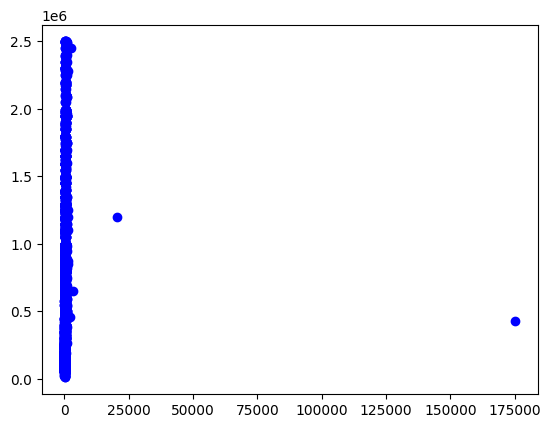

In [484]:

plt.scatter(X_larea, y, color='blue')
plt.plot(prediction_space,reg.predict(prediction_space),color='black', linewidth=3)
plt.show()
